## Intro

In [ ]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import json

factory = PokemonFactory("pokemon.json")

with open("pokemon.json", "r") as f:
    contenu = json.load(f)


    

# Ejercicio 1.A

Probabilidad usando una pokeball:
- jolteon: 0.08
- caterpie: 0.32
- snorlax: 0.02
- onix: 0.02
- mewtwo: 0.0
Probabilidad usando una ultraball:
- jolteon: 0.13
- caterpie: 0.69
- snorlax: 0.04
- onix: 0.13
- mewtwo: 0.01
Probabilidad usando una fastball:
- jolteon: 0.22
- caterpie: 0.36
- snorlax: 0.0
- onix: 0.06
- mewtwo: 0.01
Probabilidad usando una heavyball:
- jolteon: 0.03
- caterpie: 0.38
- snorlax: 0.12
- onix: 0.08
- mewtwo: 0.0


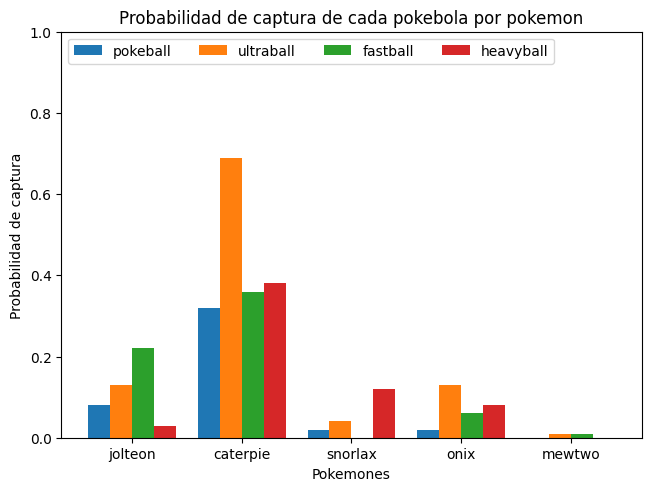

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

for j in pokeballs:
    print('Probabilidad usando una ' + j + ':')
    averages = []
    for key in contenu.keys():
        pokemon = factory.create(key, 100, StatusEffect.NONE, 1)
        results = []
        for i in range(100):
            value = attempt_catch(pokemon, j)
            results.append(value[0])
        mean_val = np.mean(results)
        print('- ' + key + ':', round(mean_val, 7))
        averages.append(mean_val)
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, label=j)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura')
ax.set_xlabel('Pokemones')
ax.set_title('Probabilidad de captura de cada pokebola por pokemon')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show()
        

# Ejercicio 1.B

Como se puede observar en el gráfico anterior, las probabilidades de captura de tanto la pokeball como la ultraball tienen un comportamiento parecido en cada pokemón, donde la pokeball tiene una probabilidad base y la de la ultraball es de aproximadamente el doble que la anterior.

Sin embargo, en el caso de la fastball se observa una variación en su probabilidad con respecto al de una pokeball en un mismo pokemón, donde, por ejemplo, para Jolteon esta probabilidad es cuatro veces mayor, mientras que para Snorlax es la misma. Esto mismo se observa también con la heavyball pero a la inversa, ya que Snorlax tiene casi el triple de probabilidad de captura en una heavyball con respecto a una pokeball, mientras que en Jolteon es la misma.

Por otro lado se encuentra Caterpie, cuyas probabilidades de captura con la fastball y heavyball son de la misma magnitud que una pokeball.

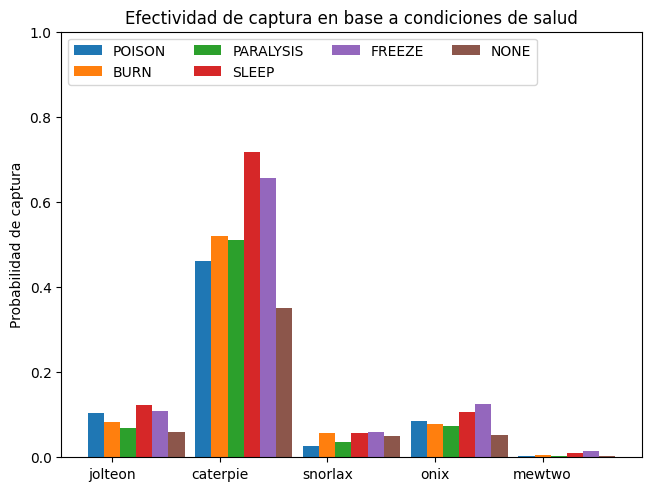

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for j in StatusEffect:
    averages = []
    for key in contenu.keys():
        pokemon = factory.create(key, 100, j, 1)
        results = []
        for i in range(500):
            value = attempt_catch(pokemon, "pokeball")
            results.append(value[0])
        averages.append(np.mean(results))
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, label=j.name)
    # ax.bar_label(bar, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura')
ax.set_title('Efectividad de captura en base a condiciones de salud')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show() 

Si, se analiza la captura con pokeballs y el porcentaje de captura es considerablemente mayor cuando los pokemones estan afectados por un estado o condicion de salud. Las condiciones mas efectivas son SLEEP Y FREEZE. Comparando con el grafico anterior se puede notar el doble de efectividad. 

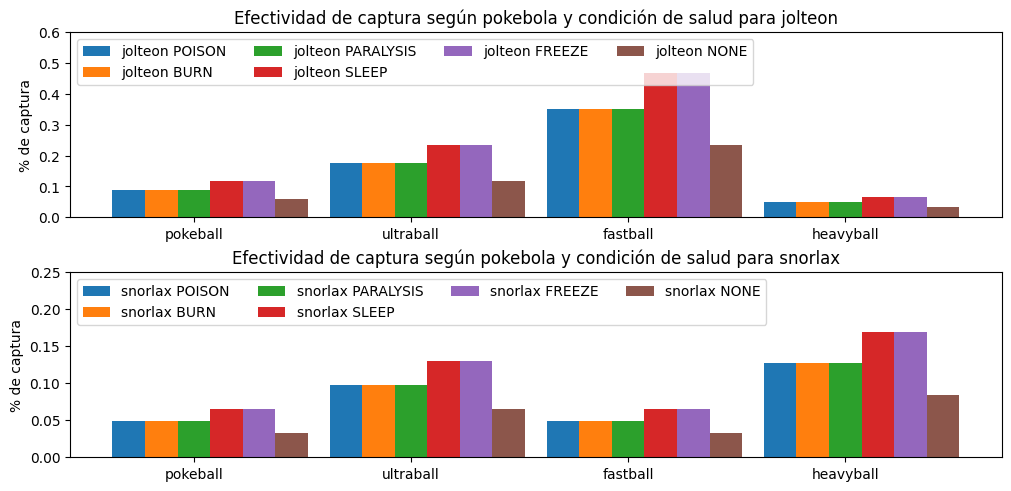

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, layout='constrained')
fig.set_figwidth(10)
pokeballs = ['pokeball', 'ultraball', 'fastball', 'heavyball']
pokemons = ['jolteon', 'snorlax']

x = np.arange(len(pokeballs))  # the label locations
width = 0.15  # the width of the bars
i = 0

for pokemon in pokemons:
    multiplier = -1
    catches = {}
    for j in StatusEffect:
        aux_poke = factory.create(pokemon, 100, j, 1)
        catches[j] = {}
        for pokeball in pokeballs:
            catch_rate = attempt_catch(aux_poke, pokeball)[1]
            catches[j][pokeball] = catch_rate
        offset = width * multiplier
        bar = ax[i].bar(x + offset, catches[j].values(), width, label='{} {}'.format(pokemon, j.name))
        # ax.bar_label(bar, padding=3)
        multiplier += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel('% de captura')
    ax[i].set_title('Efectividad de captura según pokebola y condición de salud para {}'.format(pokemon))
    ax[i].set_xticks(x + width, pokeballs)
    ax[i].legend(loc='upper left', ncols=4)
    if i == 0:
        y_lim = 0.6
    else:
        y_lim = 0.25
    ax[i].set_ylim(0, y_lim)
    i += 1

plt.show()